# Loading Data

In [1]:
import numpy as np
from sklearn . datasets import load_digits
digits = load_digits ()


In [2]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits ["target_names"]

In [3]:
full_data = np.column_stack((data, target))

###### Choosing jsut the images which are 3 or 8 

In [4]:
mini_data = full_data[np.where((full_data[:,64] == 3) | (full_data[:,64] == 8))]

In [5]:
mini_features= mini_data[:, 0:64]

In [6]:
mini_target= mini_data[:,64]
mini_target= mini_target.reshape(357,1)
mini_target.shape


(357, 1)

In [7]:
mini_target[mini_target == 3] = 1
mini_target[mini_target == 8] = -1


In [8]:
mini_features= mini_data[:, 0:64]
mini_features.shape
intercept= np.full(shape=357,fill_value=1,dtype=np.float64())

In [9]:
feature = np.column_stack(( mini_features,intercept,))
feature

array([[ 0.,  0.,  7., ...,  0.,  0.,  1.],
       [ 0.,  0.,  9., ...,  1.,  0.,  1.],
       [ 0.,  2.,  9., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0., 10., ...,  1.,  0.,  1.]])

# Running Binary Classification Model

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [11]:
accuracy_criteria = []
model_accuracies =  []
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

regularization = [0.00000001,0.0000001,0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000, 10000, 100000, 1000000, 1000000]




regularization       Model Accuracy
##############################


In [16]:
print("Lambda           Model Accuracy")
for candidate in regularization:
    LR = LogisticRegression(C = candidate , penalty = 'l2', solver= 'liblinear')
    accuracy = cross_val_score(LR, feature, y = mini_target.reshape(-1,), cv = 5)
    model_accuracies.append(np.mean(accuracy))
    print(candidate, "          ",model_accuracies[-1])

Lambda           Model Accuracy
1e-08            0.9352503912363067
1e-07            0.9352503912363067
1e-06            0.9352895148669796
1e-05            0.9493740219092333
0.0001            0.9522691705790297
0.001            0.9495305164319248
0.01            0.9580203442879499
0.1            0.9636541471048513
1            0.966431924882629
10            0.9636150234741784
100            0.9608372456964005
1000            0.9580203442879499
10000            0.9580203442879499
100000            0.9580203442879499
1000000            0.9580203442879499
1000000            0.9580203442879499


#### The best regularization factor is 1 

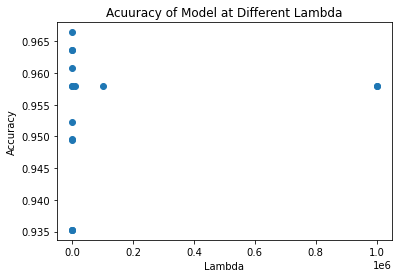

In [13]:
import matplotlib.pyplot as plt
plt.scatter(regularization, model_accuracies)
plt.title("Acuuracy of Model at Different Lambda")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
model_accuracies


In [ ]:
regularization